In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Define Plot functions

In [2]:
def plot_progress_log_data(prog_df, title=[''], row=1, col=5, figwidth=18, figheight=18, figname=''):
    """Plot epoch log data"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    
    for d_i in range(len(title)):
        axes.flat[d_i].plot(np.arange(len(prog_df['Epoch'])), prog_df[title[d_i]])
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].set_xlabel('Epoch')
    
    # Invisualize empty axis
    if len(title) < row*col:
        for a_emp in range(len(title), row*col):
            axes.flat[a_emp].axis('off')

    plt.tight_layout()
    plt.savefig(figname, dpi=300)
    
def plot_experience_summary(data, title, row, col, markersize = 0.015,figname=''):
    """Plot reward, uncertainty, rnd_act_error, and rnd_cri_error"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(18)
    f.set_figheight(3)
    
    for d_i in range(len(data)):
        axes.flat[d_i].plot(np.arange(data[d_i].shape[0]), data[d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    if len(data) < row*col:
        for a_emp in range(len(data), row*col):
            axes.flat[a_emp].axis('off')
    plt.savefig(figname, dpi=300)

    
def plot_explerience(data, row, col, markersize=0.15, figtitle='obs', figname='experience_ob.jpg', 
                     figwidth=18, figheight=18,sharey=False):
    """Plot experience log data"""
    f, axes = plt.subplots(row,col,sharey=sharey)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    for d_i in range(data.shape[1]):
        axes.flat[d_i].plot(np.arange(data.shape[0]), data[:,d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}_{}'.format(figtitle, d_i))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    for a_emp in range(data.shape[1], row*col):
        axes.flat[a_emp].axis('off')
    
    plt.tight_layout()
    plt.savefig(figname, dpi=300)

def plot_uncertainty_change_on_sampled_obervations(data_df, act_dim):
    for obs_i in range(10):
        rnd_pred_error = data_df['Obs{}_rnd_error'.format(obs_i)].values
        rnd_pred = data_df[['Obs{}_rnd_p_{}'.format(obs_i, rnd_j) for rnd_j in range(act_dim)]].values
        rnd_targ = data_df[['Obs{}_rnd_t_{}'.format(obs_i, rnd_j) for rnd_j in range(act_dim)]].values
        rnd_loss = np.mean((rnd_pred-rnd_targ)**2, axis=1)

        cov_matrix = data_df[['Obs{}_unc_{}'.format(obs_i, unc_j) for unc_j in range(act_dim**2)]].values
        unc_sum_diag = [np.sum(cov_matrix[i, [0,1*(act_dim+1),2*(act_dim+1)]]) for i in range(cov_matrix.shape[0])]
        unc_mean_cov = np.mean(np.abs(cov_matrix), axis=1)

        f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
        f.set_figwidth(18)

        ax1.plot(np.arange(len(rnd_pred_error)), rnd_pred_error, 'r-')
        ax1.set_title('Obs_{} RND Prediction Error'.format(obs_i))

        ax2.plot(np.arange(len(rnd_loss)), rnd_loss, 'r-')
        ax2.set_title('Obs_{} RND Loss'.format(obs_i))

        ax3.plot(np.arange(len(unc_mean_cov)), unc_mean_cov, 'r-')
        ax3.set_title('Obs_{} Uncertainty Mean'.format(obs_i))

        ax4.plot(np.arange(len(unc_sum_diag)), unc_sum_diag, 'r-')
        ax4.set_title('Obs_{} Uncertainty Diag'.format(obs_i))

# Hopper-v2

In [3]:
# data_path = r"\dropout_uncertainty.txt"

log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-22_ude_td3_Hopper_v2\2019-04-22_00-49-08-ude_td3_Hopper_v2_s3"

prog_log_path = "{}\progress.txt".format(log_dir)
prog_df = pd.read_csv(prog_log_path,  sep='\t')

exp_log_path = "{}\experiences_log.txt".format(log_dir)
experiences_df = pd.read_csv(exp_log_path,  sep='\t')

sampled_obs_log_path = "{}\dropout_uncertainty.txt".format(log_dir)
sampled_obs_df = pd.read_csv(sampled_obs_log_path,  sep='\t')

act_dim = 3

# HalfCheetah-v2
## Load log data

In [37]:

experiences_path = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-24_ude_td3_test_rnd_act_error_as_concentration\2019-04-24_10-21-35-ude_td3_test_rnd_act_error_as_concentration_s3\experiences_log.txt"
# experiences_path = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-24_ude_td3_test_rnd_act_error_as_concentration\2019-04-24_14-21-25-ude_td3_test_rnd_act_error_as_concentration_s3\experiences_log.txt"
# log_dir = r'C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-25_ude_td3_HalfCheetah_v2_Unc_PDelay_5000_Con_0_5\2019-04-25_00-51-55-ude_td3_HalfCheetah_v2_Unc_PDelay_5000_Con_0_5_s3'

# log_dir = r'C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-25_ude_td3_HalfCheetah_v2_debug_action_lim\2019-04-25_14-24-48-ude_td3_HalfCheetah_v2_debug_action_lim_s3'
log_dir = r'C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-23_ude_td3_test_critic_error_q_sample\2019-04-23_11-49-18-ude_td3_test_critic_error_q_sample_s3'
log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-05-06_ude_td3_batchP\2019-05-06_01-02-03-ude_td3_batchP_s3"

# 100 post samples
log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-05-06_ude_td3_batchP_HalfCheetah_v2_1000ps_0_5concen\2019-05-06_08-19-33-ude_td3_batchP_HalfCheetah_v2_1000ps_0_5concen_s3"
# 100 post sample + rnd uncertainty
log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-05-07_ude_td3_batchP_debug\2019-05-07_19-00-16-ude_td3_batchP_debug_s3"

prog_log_path = "{}\progress.txt".format(log_dir)
prog_df = pd.read_csv(prog_log_path,  sep='\t')

exp_log_path = "{}\experiences_log.txt".format(log_dir)
experiences_df = pd.read_csv(exp_log_path,  sep='\t')

sampled_obs_log_path = "{}\dropout_uncertainty.txt".format(log_dir)
sampled_obs_df = pd.read_csv(sampled_obs_log_path,  sep='\t')

## Plot uncertainty of sampled observations

In [38]:
# plot_uncertainty_change_on_sampled_obervations(sampled_obs_df, act_dim = 6)

## Plot epoch log data

In [39]:
# experiences_df['AverageEpRet']
prog_df.columns

Index(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet',
       'AverageTestEpRet', 'StdTestEpRet', 'MaxTestEpRet', 'MinTestEpRet',
       'EpLen', 'TestEpLen', 'TotalEnvInteracts', 'AverageQ1Vals', 'StdQ1Vals',
       'MaxQ1Vals', 'MinQ1Vals', 'AverageQ2Vals', 'StdQ2Vals', 'MaxQ2Vals',
       'MinQ2Vals', 'LossPi', 'LossQ', 'LossRndAct', 'LossRndCri',
       'AverageEpQ1Var', 'StdEpQ1Var', 'MaxEpQ1Var', 'MinEpQ1Var',
       'AverageEpQ2Var', 'StdEpQ2Var', 'MaxEpQ2Var', 'MinEpQ2Var',
       'AverageEpUncAct', 'StdEpUncAct', 'MaxEpUncAct', 'MinEpUncAct',
       'AverageEpUncRndAct', 'StdEpUncRndAct', 'MaxEpUncRndAct',
       'MinEpUncRndAct', 'AverageEpUncQ1', 'StdEpUncQ1', 'MaxEpUncQ1',
       'MinEpUncQ1', 'AverageEpUncQ2', 'StdEpUncQ2', 'MaxEpUncQ2',
       'MinEpUncQ2', 'AverageEpUncRndQ', 'StdEpUncRndQ', 'MaxEpUncRndQ',
       'MinEpUncRndQ', 'AverageEpRndErrorAct', 'StdEpRndErrorAct',
       'MaxEpRndErrorAct', 'MinEpRndErrorAct', 'AverageEpRndErrorCri',
       'StdEpRn

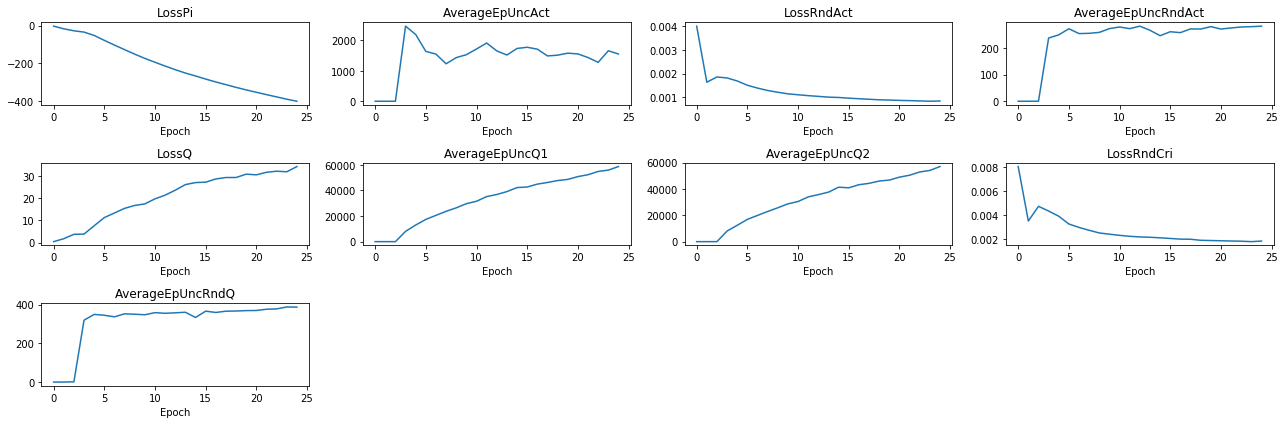

In [40]:
title=['LossPi','AverageEpUncAct', 'LossRndAct', 'AverageEpUncRndAct', 
       'LossQ', 'AverageEpUncQ1', 'AverageEpUncQ2', 
       'LossRndCri', 'AverageEpUncRndQ']
plot_progress_log_data(prog_df, title, row=3, col=4, figwidth=18, figheight=6, figname='exp_summary_epoch.jpg')

In [41]:
# title=['LossPi','LossQ','AverageEpUncertainty','LossRndAct','LossRndCri','AverageEpRet','AverageTestEpRet']
# title=['LossPi','LossQ','AverageEpUncAct', 'AverageEpUncRndAct', 'LossRndAct','LossRndCri','AverageEpRet','AverageTestEpRet']
# plot_progress_log_data(prog_df, title, row=2, col=5, figwidth=18, figheight=6, figname='exp_summary_epoch.jpg')

## Plot experience log data
### Plot reward, uncertainty and RND error

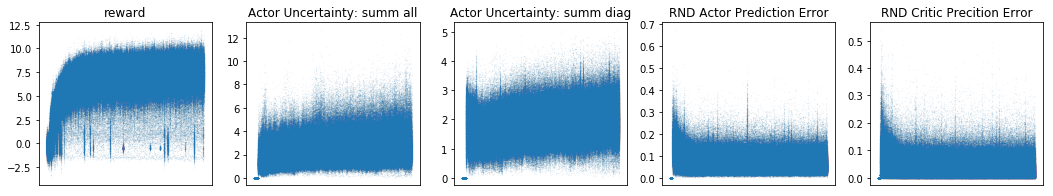

In [8]:
act_dim = 6

exp_reward = experiences_df['r'].values
exp_unc = experiences_df[['unc_{}'.format(unc_j) for unc_j in range(act_dim**2)]].values
exp_unc_sum_all = np.sum(exp_unc, axis=1)
# np.sum(exp_unc[:, diag_index], axis=1)
exp_unc_sum_diag = np.sum(exp_unc[:, [j*(act_dim+1) for j in range(act_dim)]], axis=1)
exp_rnd_e_act = experiences_df['rnd_e_act'].values
exp_rnd_e_cri = experiences_df['rnd_e_cri'].values
exp_summary_data = [exp_reward, exp_unc_sum_all, exp_unc_sum_diag, exp_rnd_e_act, exp_rnd_e_cri]
exp_summary_title = ['reward', 'Actor Uncertainty: summ all', 'Actor Uncertainty: summ diag', 
                     'RND Actor Prediction Error', 'RND Critic Precition Error']
plot_experience_summary(exp_summary_data, exp_summary_title, row=1, col=5, markersize = 0.05, figname='exp_summary_exp.jpg')

### Plot observations

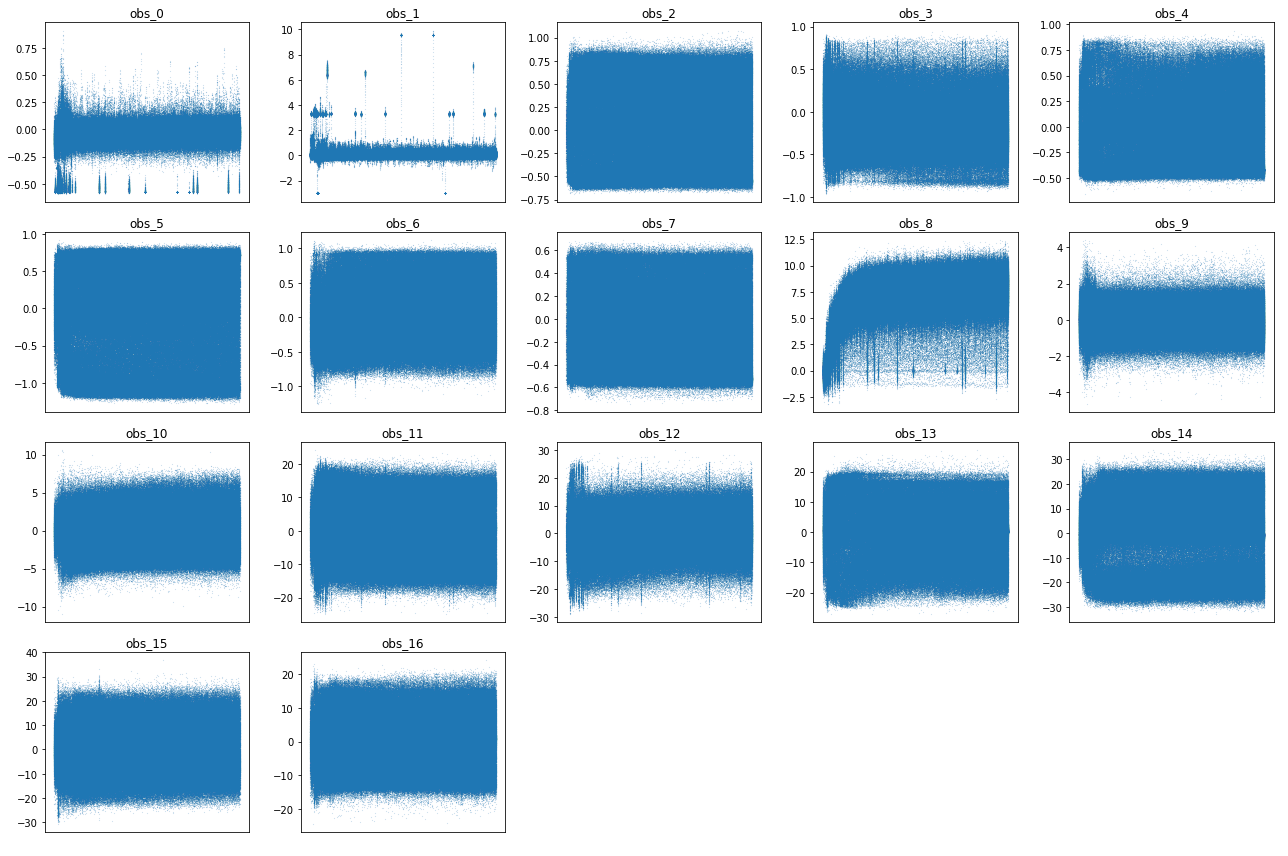

In [9]:
obs_dim = 17
exp_obs = experiences_df[['o_{}'.format(i) for i in range(obs_dim)]].values
plot_explerience(exp_obs, 4, 5, markersize=0.15, figtitle='obs', figname='experience_obs.jpg', 
                 figwidth=18, figheight=12)


### Plot actions

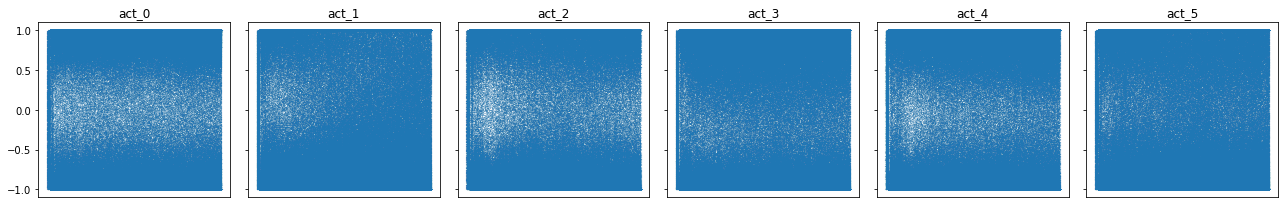

In [10]:
act_dim = 6
exp_act = experiences_df[['a_{}'.format(i) for i in range(act_dim)]].values
plot_explerience(exp_act, 1, 6, markersize=0.15, figtitle='act', figname='experience_act.jpg', 
                 figwidth=18, figheight=3, sharey=True)

### Plot covariance-matrix-based uncertinaty

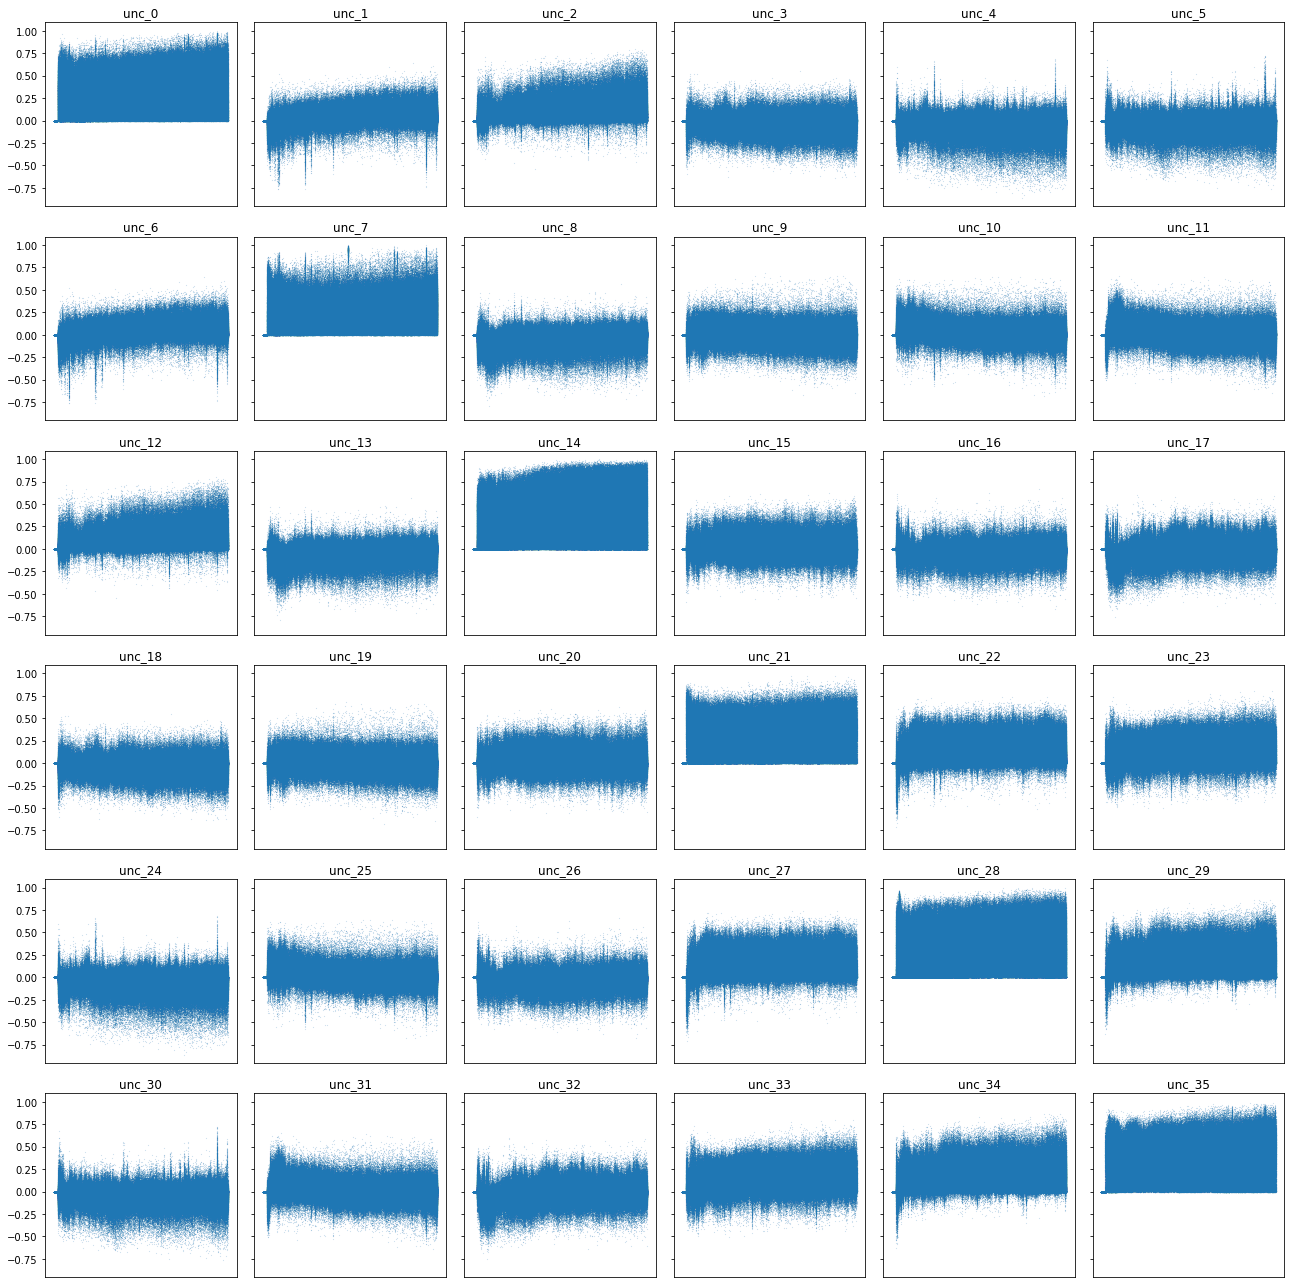

In [11]:
exp_unc = experiences_df[['unc_{}'.format(unc_j) for unc_j in range(act_dim**2)]].values
plot_explerience(exp_unc, act_dim, act_dim, markersize=0.15, figtitle='unc', figname='experience_unc.jpg', 
                 figwidth=18, figheight=18, sharey=True)

# concentration_factor = 0.5
# plot_explerience(exp_unc*concentration_factor, act_dim, act_dim, markersize=0.15, figtitle='unc', figname='experience_unc.jpg', 
#                  figwidth=18, figheight=18, sharey=True)

### Plot q1_post and q2_post

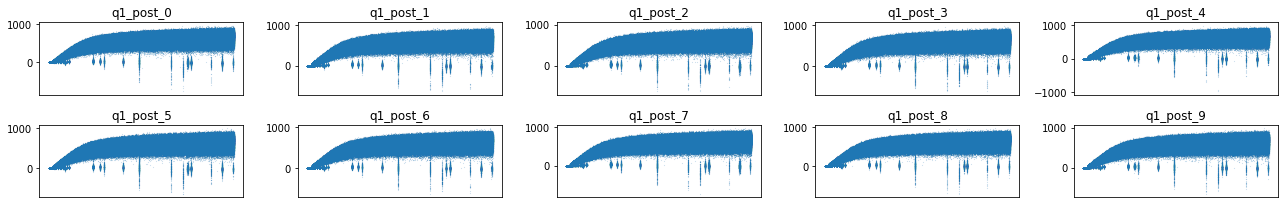

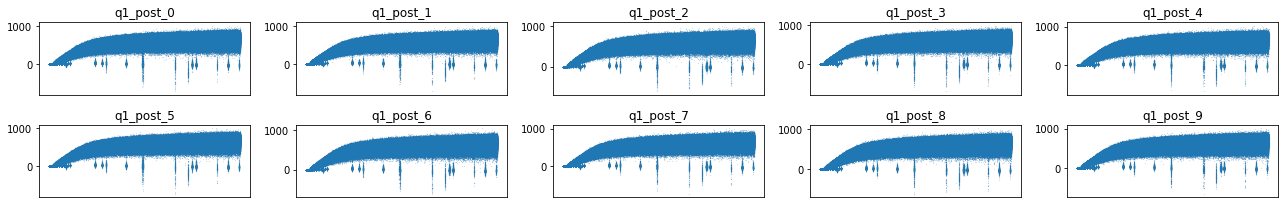

In [12]:
n_post_action = 10
exp_q1_post = experiences_df[['q1_post_{}'.format(i) for i in range(n_post_action)]].values
exp_q2_post = experiences_df[['q2_post_{}'.format(i) for i in range(n_post_action)]].values

plot_explerience(exp_q1_post, 2, 5, markersize=0.15, figtitle='q1_post', figname='q1_post.jpg', 
                 figwidth=18, figheight=3)

plot_explerience(exp_q2_post, 2, 5, markersize=0.15, figtitle='q1_post', figname='q2_post.jpg', 
                 figwidth=18, figheight=3)


#### Examine if post sampled q-value in a reasonable range

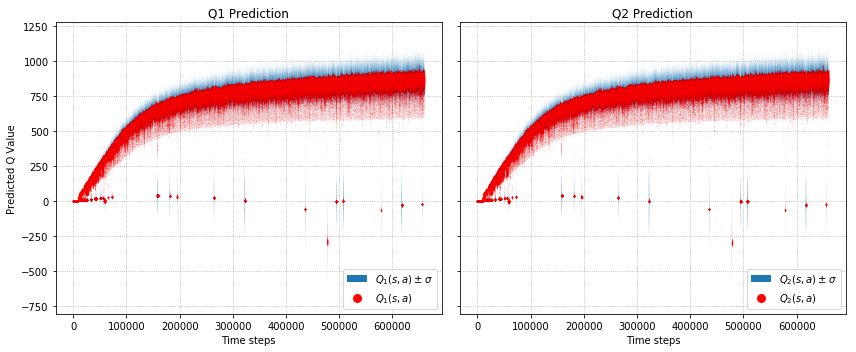

In [13]:
q1_pred = experiences_df['q1_pred']
q2_pred = experiences_df['q2_pred']
q1_post = experiences_df[['q1_post_{}'.format(i) for i in range(10)]].values
q2_post = experiences_df[['q2_post_{}'.format(i) for i in range(10)]].values
q1_post_std = np.std( q1_post, axis=1)
q2_post_std = np.std( q2_post, axis=1)
q1_mean = np.mean(q1_post, axis=1)
q2_mean = np.mean(q1_post, axis=1)
q1_min = np.min(q1_post, axis=1)
q2_min = np.min(q1_post, axis=1)
q1_max = np.max(q1_post, axis=1)
q2_max = np.max(q1_post, axis=1)
q1_median = np.median(q1_post, axis=1)
q2_median = np.median(q1_post, axis=1)

step_start = 0
step_end = len(experiences_df['Step'])

f, axes = plt.subplots(1, 2, sharey=True)
f.set_figwidth(12)
f.set_figheight(5)

q1_up = q1_pred[step_start:step_end]+q1_post_std[step_start:step_end]
q1_down = q1_pred[step_start:step_end]-q1_post_std[step_start:step_end]
q1_var_h = axes[0].fill_between(np.arange(step_start,step_end), q1_up, q1_down)
q1_pred_h = axes[0].plot(np.arange(step_start,step_end), q1_pred[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[0].set_title('Q1 Prediction')

q2_up = q2_pred[step_start:step_end]+q2_post_std[step_start:step_end]
q2_down = q2_pred[step_start:step_end]-q2_post_std[step_start:step_end]
q2_var_h = axes[1].fill_between(np.arange(step_start,step_end), q2_up, q2_down)
q2_pred_h = axes[1].plot(np.arange(step_start,step_end), q2_pred[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[1].set_title('Q2 Prediction')

axes[0].set_ylabel('Predicted Q Value')
axes[0].set_xlabel('Time steps')
axes[1].set_xlabel('Time steps')

axes[0].grid(True, linestyle=':')
axes[1].grid(True, linestyle=':')

q1_legend_elements = [q1_var_h,
                      Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='r', markersize=10)]
q1_legend_elements = [q2_var_h,
                      Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='r', markersize=10)]
axes[0].legend(q1_legend_elements, [r'$Q_{1}\left ( s,a \right )\pm \sigma $', r'$Q_{1}\left ( s,a \right )$'],loc='lower right')
axes[1].legend(q1_legend_elements, [r'$Q_{2}\left ( s,a \right )\pm \sigma $', r'$Q_{2}\left ( s,a \right )$'],loc='lower right')

plt.tight_layout()

#### Compare difference strategies for conservative q-value estimation 

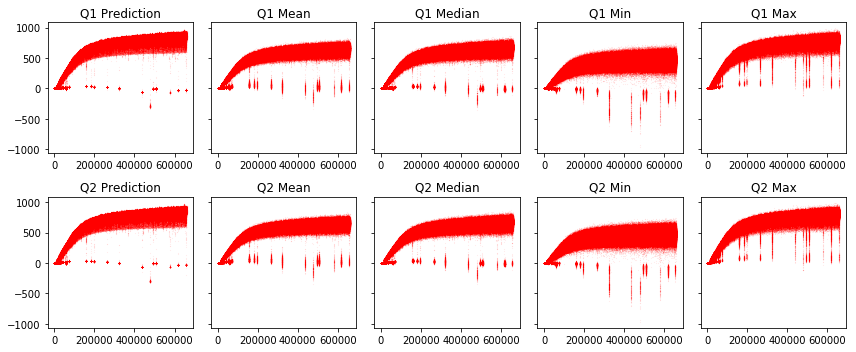

In [14]:
f, axes = plt.subplots(2, 5, sharey=True)
f.set_figwidth(12)
f.set_figheight(5)

axes[0][0].plot(np.arange(step_start,step_end), q1_pred[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[0][0].set_title('Q1 Prediction')
axes[0][1].plot(np.arange(step_start,step_end), q1_mean[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[0][1].set_title('Q1 Mean')
axes[0][2].plot(np.arange(step_start,step_end), q1_median[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[0][2].set_title('Q1 Median')
axes[0][3].plot(np.arange(step_start,step_end), q1_min[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[0][3].set_title('Q1 Min')
axes[0][4].plot(np.arange(step_start,step_end), q1_max[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[0][4].set_title('Q1 Max')

axes[1][0].plot(np.arange(step_start,step_end), q2_pred[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[1][0].set_title('Q2 Prediction')
axes[1][1].plot(np.arange(step_start,step_end), q2_mean[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[1][1].set_title('Q2 Mean')
axes[1][2].plot(np.arange(step_start,step_end), q2_median[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[1][2].set_title('Q2 Median')
axes[1][3].plot(np.arange(step_start,step_end), q2_min[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[1][3].set_title('Q2 Min')
axes[1][4].plot(np.arange(step_start,step_end), q2_max[step_start:step_end], 'r.', alpha=1/4,markersize=0.2)
axes[1][4].set_title('Q2 Max')

plt.tight_layout()
# plt.grid(True, linestyle=':')

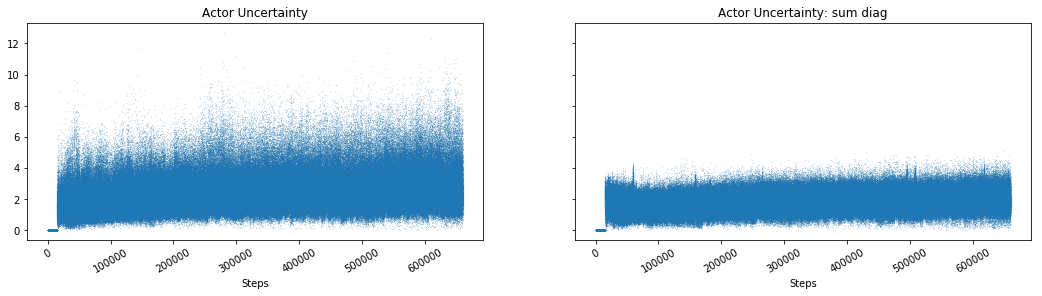

In [15]:
f, axes = plt.subplots(1,2,sharey=True)
f.set_figwidth(18)
act_dim = 6
markersize = 0.15
exp_unc = experiences_df[['unc_{}'.format(unc_j) for unc_j in range(act_dim**2)]].values
axes[0].plot(np.arange(len(experiences_df['Step'])), np.sum(exp_unc, axis=1), '.',markersize=markersize)
axes[0].set_title('Actor Uncertainty')
axes[0].set_xlabel('Steps')
axes[0].xaxis.set_tick_params(rotation=30)

diag_index = [j*(act_dim+1) for j in range(act_dim)]
axes[1].plot(np.arange(len(experiences_df['Step'])), np.sum(exp_unc[:, diag_index], axis=1), '.',markersize=markersize)
axes[1].set_title('Actor Uncertainty: sum diag')
axes[1].set_xlabel('Steps')
axes[1].xaxis.set_tick_params(rotation=30)

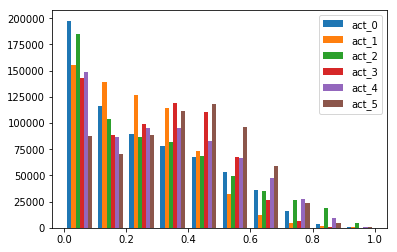

In [16]:
plt.figure()
plt.hist(exp_unc[:, diag_index])
plt.legend(['act_{}'.format(i) for i in range(act_dim)])


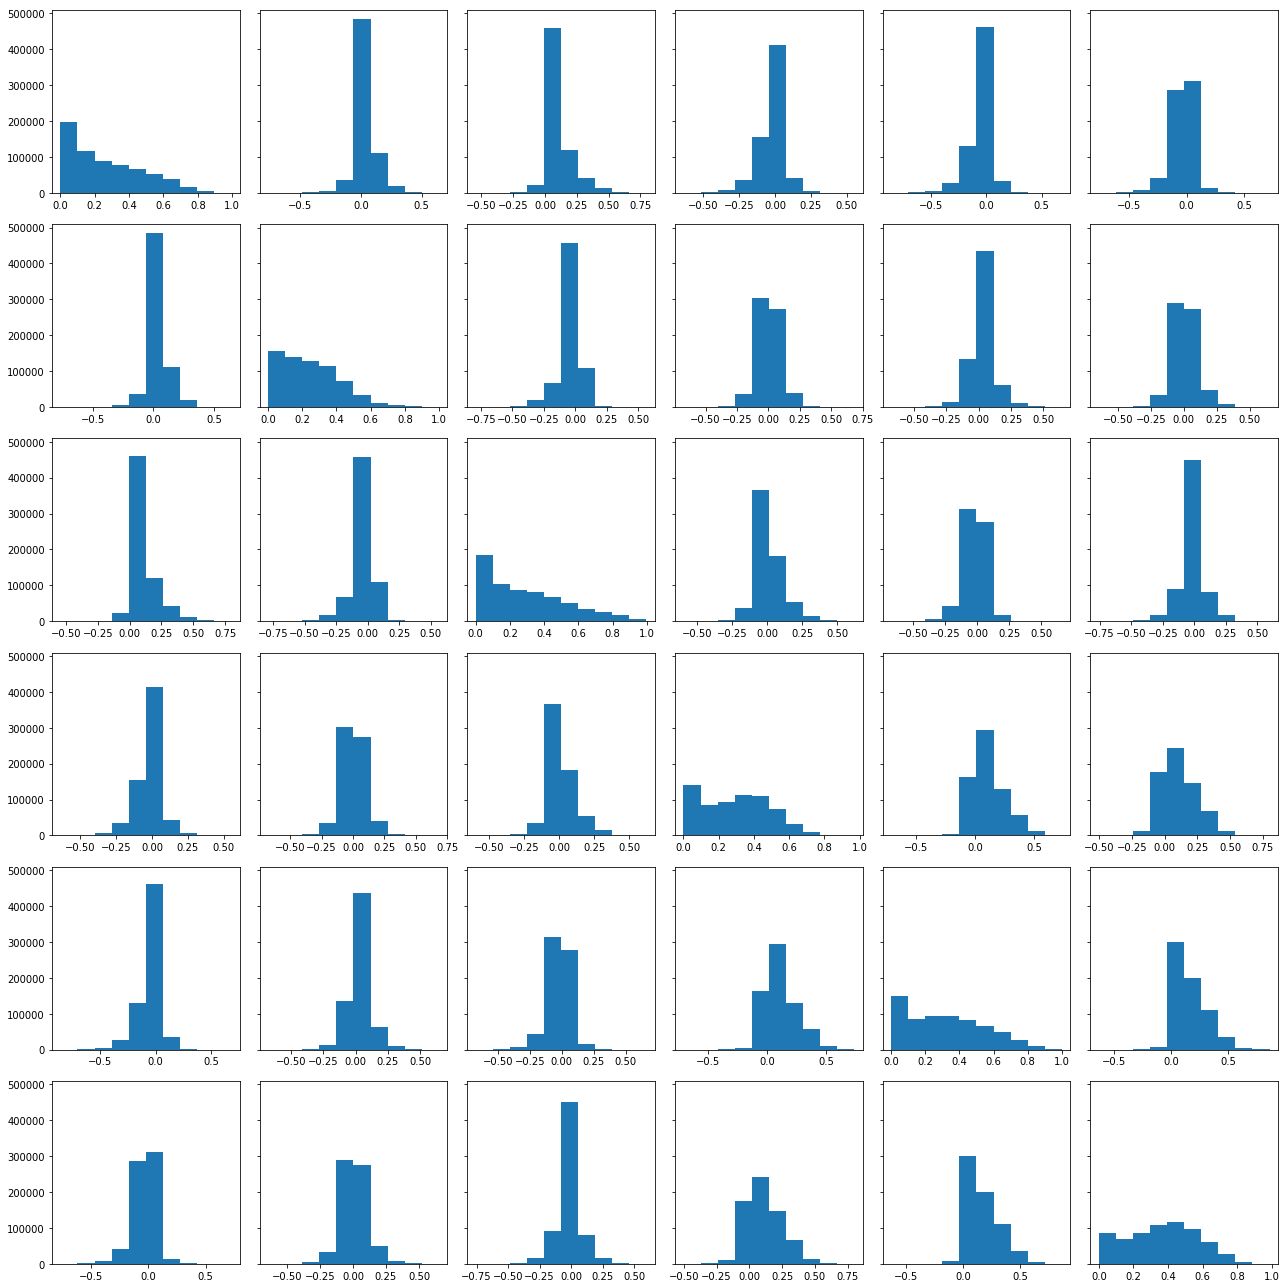

In [17]:
act_dim = 6
f, axes = plt.subplots(act_dim,act_dim,sharey=True)
f.set_figwidth(18)
f.set_figheight(18)

exp_unc = experiences_df[['unc_{}'.format(unc_j) for unc_j in range(act_dim**2)]].values
for i in range(act_dim):
    for j in range(act_dim):
        axes[i][j].hist(exp_unc[:,(i*act_dim+j)])
#         axes[i][j].set_title('Actor Uncertainty')
#         axes[i][j].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
plt.tight_layout()

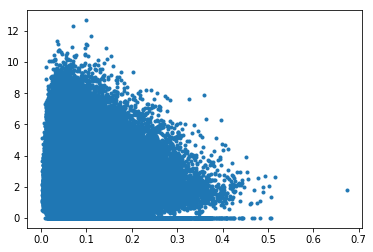

In [18]:
plt.figure()
plt.plot( experiences_df['rnd_e_act'].values[10001:], np.sum(exp_unc, axis=1)[10001:], '.')

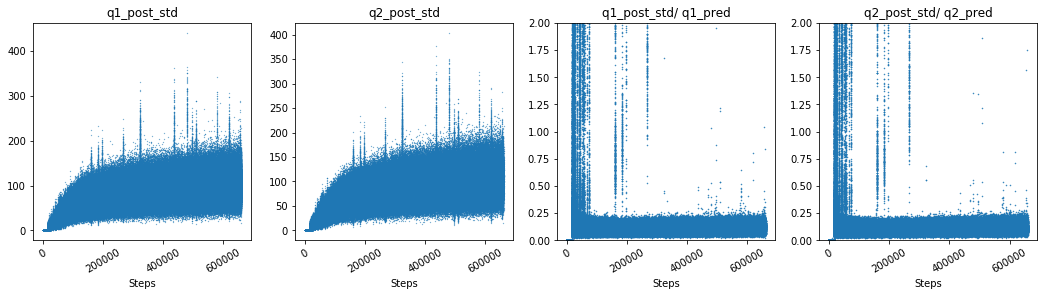

In [19]:
f, axes = plt.subplots(1,4)
f.set_figwidth(18)
axes[0].plot(np.arange(len(q1_post_std)), q1_post_std, '.',markersize=0.5)
axes[0].set_title('q1_post_std')
axes[0].set_xlabel('Steps')
axes[0].xaxis.set_tick_params(rotation=30)

axes[1].plot(np.arange(len(q2_post_std)), q2_post_std, '.',markersize=0.5)
axes[1].set_title('q2_post_std')
axes[1].set_xlabel('Steps')
axes[1].xaxis.set_tick_params(rotation=30)

axes[2].plot(np.arange(len(q1_post_std)), q1_post_std/ (q1_pred.values + 0.00000000001), '.',markersize=1)
axes[2].set_ylim([0,2])
axes[2].set_title('q1_post_std/ q1_pred')
axes[2].set_xlabel('Steps')
axes[2].xaxis.set_tick_params(rotation=30)

axes[3].plot(np.arange(len(q2_post_std)), q2_post_std/ (q2_pred.values + 0.00000000001), '.',markersize=1)
axes[3].set_ylim([0,2])
axes[3].set_title('q2_post_std/ q2_pred')
axes[3].set_xlabel('Steps')
axes[3].xaxis.set_tick_params(rotation=30)
